# 
1. 문제해결 과정
2. 어플설치

모바일 넷의 구조 (CNN)  
 squeez net ...

hyper parameter

- Learning Rate : 정답을 가까워 지게 할 때의 보폭
- epochs : 훈련데이터를 몇번 반복하는지
- Training Data Fraction : 검증데이터의 비율 0.2~0.3
- Optimizer : Adam 을 제일 많이쓴다. 출력이 정답에 가까워지게 만드는 함수

현업에서는 머신러닝을 더 많이 쓴다.

CNN은 색상보다 패턴을 더 잘 학습한다.

aix 의역할 personalimageclassifier

## 시각화 해보기 목표
- 지도 시각화
        
      !pip install folium
- 데이터에서 새로운 feature를 생성
- 데이터를 지도 시각화
- json 데이터 다루기

In [2]:
import pandas as pd
import numpy as np
import folium
import json

busan_csv = pd.read_csv("busan/busan.csv",
                        encoding="cp949",
                        index_col = 0)

busan_csv.head()

# 데이터를 보고 추정해야한다.
# price (단위: 만원)
# population (단위: 명)
# aera (단위: km^2)

FileNotFoundError: [Errno 2] No such file or directory: 'busan/busan.csv'

In [ ]:
with open('busan/busan_gu.json', encoding="utf-8") as f:
    geo_json = json.load(f)

# 키값 확인
geo_json.keys()
geo_json['features'][0]

{'type': 'Feature',
 'id': '중구',
 'properties': {'code': '21010',
  'name': '중구',
  'name_eng': 'Jung-gu',
  'base_year': '2013'},
 'geometry': {'type': 'Polygon',
  'coordinates': [[[129.032, 35.116],
    [129.038, 35.112],
    [129.042, 35.111],
    [129.041, 35.108],
    [129.038, 35.104],
    [129.038, 35.098],
    [129.037, 35.097],
    [129.029, 35.096],
    [129.026, 35.096],
    [129.024, 35.1],
    [129.022, 35.102],
    [129.021, 35.106],
    [129.023, 35.109],
    [129.024, 35.109],
    [129.026, 35.111],
    [129.028, 35.11],
    [129.028, 35.115],
    [129.032, 35.116]]]}}

In [ ]:
print([item['id'] for item in (geo_json['features'])])

['중구', '서구', '동구', '영도구', '부산진구', '동래구', '남구', '북구', '해운대구', '사하구', '금정구', '강서구', '연제구', '수영구', '사상구', '기장군']


In [ ]:


map = folium.Map(location = [35.1856505, 129.1],
                 zoom_start = 10)

folium.Choropleth(geo_data = geo_json,
                  data = busan_csv["population"],
                  fill_color = "PuBu",
                  key_on = "feature.id",
                  legend_name="부산 인구수 (단위: 명)").add_to(map)

map

In [ ]:
[item['id'] for item in (geo_json['features'])]

map = folium.Map(location = [35.1856505, 129.1],
                 zoom_start = 10)

folium.Choropleth(geo_data = geo_json,
                  data = busan_csv["price"],
                  fill_color = "PuOr",
                  key_on = "feature.id",
                  legend_name="집 값 평균 (단위: 만원)").add_to(map)

map

In [ ]:
[item['id'] for item in (geo_json['features'])]

map = folium.Map(location = [35.1856505, 129.1],
                 zoom_start = 10)

folium.Choropleth(geo_data = geo_json,
                  data = busan_csv["area"],
                  fill_color = "PuBuGn",
                  key_on = "feature.id",
                  legend_name="넓이 (단위: 넓이 km^2)").add_to(map)

map

In [ ]:
# version chack
print(np.__version__)
print(pd.__version__)
print(folium.__version__)
print(json.__version__)

1.26.4
2.2.2
0.16.0
2.0.9


과제.

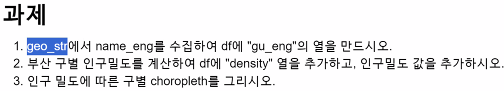

과제 1)

In [3]:
import pandas as pd
import numpy as np
import folium
import json

busan_csv = pd.read_csv("busan/busan.csv",
                        encoding="cp949",
                        index_col = 0)

with open('busan/busan_gu.json', encoding="utf-8") as f:
    geo_json = json.load(f)


geo_json['features'][0]['properties']['name_eng']
geo_json['features'][0]['id']

dict_of_eng = {}
for i in range(len(busan_csv)):
    dict_of_eng[geo_json['features'][i]['id']]=geo_json['features'][i]['properties']['name_eng']

name_eng_col = pd.Series(dict_of_eng.values(),
                         index=dict_of_eng.keys(),
                         name="name_eng")

# price (단위: 만원)
# population (단위: 명)
# aera (단위: km^2)
busan_df = pd.concat([busan_csv, name_eng_col],axis=1)
busan_df.head()

,price,population,area,name_eng
중구,15515,44852,2.83,Jung-gu
서구,28665,112621,13.98,Seo-gu
동구,20729,89144,9.74,Dong-gu
영도구,17024,121934,14.20,Youngdo-gu
부산진구,28781,365337,29.67,Busanjin-gu


과제 2)

In [4]:
density_of_pop = pd.Series(busan_df.population / busan_df.area,
                           name="density").astype("int64")

busan_df_2 = pd.concat([busan_df, density_of_pop],axis=1)
busan_df_2.head()

,price,population,area,name_eng,density
중구,15515,44852,2.83,Jung-gu,15848
서구,28665,112621,13.98,Seo-gu,8055
동구,20729,89144,9.74,Dong-gu,9152
영도구,17024,121934,14.20,Youngdo-gu,8586
부산진구,28781,365337,29.67,Busanjin-gu,12313


과제 3)

In [5]:
map = folium.Map(location = [35.1856505, 129.1],
                 zoom_start = 12)

folium.Choropleth(geo_data = geo_json,
                  data = busan_df_2["density"],
                  fill_color = "PuBuGn",
                  key_on = "feature.id",
                  legend_name="밀도 (단위: 인구수 / 넓이 명/km^2)").add_to(map)

map